<a href="https://colab.research.google.com/github/Mahendran180923/employee_attrition/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis

In [ ]:
%%writefile app.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, root_mean_squared_error
import streamlit as st
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder




encoder = {}
categorical_col = df.select_dtypes(include='object').columns
for col in categorical_col:
    encoder[col] = LabelEncoder()
    df[col] = encoder[col].fit_transform(df[col])


# Store the encoded file in pickle format
with open("encoder.pkl", 'wb') as f:
    pickle.dump(encoder, f)


# Outlier detecton
for col in df.columns:
    z_scores = np.abs(df[col] - df[col].mean() / df[col].std())
    outliers = df[z_scores > 4]
    # print(f"Outliers in column '{col}': {outliers.shape[0]}")
    # print(outliers)


# Find correlation
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()


# Machine Learning Model development

# Feature Selection
x = df.drop(['Attrition'], axis=1)
y = df['Attrition']


# Various Model Training
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.20, random_state=42)


# Random Forest Classifier Model
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(x_train, y_train)

# Gradient Boosting Classifier Model
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train, y_train)

# Decision Tree Classifier Model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Model Evaluation Metrics
rfc_score = rfc.score(x_test, y_test)
gbc_score = gbc.score(x_test, y_test)
dtc_score = dtc.score(x_test, y_test)

print(f'Random Forest Accuracy Score: {rfc_score}')
print(f'Gradient Boosing Accuracy Score: {gbc_score}')
print(f'Decision Tree Accuracy Score: {dtc_score}')


# Save the model as pickle file
with open("model.pkl", 'wb') as f:
  pickle.dump(rfc, f)

# option = st.selectbox('Select employee number to fetch employee details or select details manually', ['Select Manually', 'Use Employee Number'])

# # if option == 'Select Manually':
if __name__ == "__main__":
  st.title("Employee Attrition Prediction")
  Age = st.number_input('Age', 18, 60)
  BusinessTravel = st.selectbox('BusinessTravel', employee_data['BusinessTravel'].unique())
  DailyRate = st.selectbox('DailyRate', sorted(employee_data['DailyRate'].unique()))
  Department = st.selectbox('Department', employee_data['Department'].unique())
  DistanceFromHome = st.selectbox('DistanceFromHome', sorted(employee_data['DistanceFromHome'].unique()))
  Education = st.selectbox('Education: Select "1" for below college or select "2" for above college ', employee_data['Education'].unique())
  EducationField = st.selectbox('EducationField', employee_data['EducationField'].unique())
  EnvironmentSatisfaction = st.selectbox('Satisfaction with the work environment: "1" = Low, "2" = Medium, "3" = High, "4" = Very High', sorted(employee_data['EnvironmentSatisfaction'].unique()))
  Gender = st.selectbox('Gender', employee_data['Gender'].unique())
  HourlyRate = st.selectbox('The employee hourly rate of pay', sorted(employee_data['HourlyRate'].unique()))
  JobInvolvement = st.selectbox('level of involvement the employee has in their job: "1" = Low, "2" = Medium, "3" = High, "4" = Very High', sorted(employee_data['JobInvolvement'].unique()) )
  JobLevel = st.selectbox('Job level of the Employee : e.g., "1" = Entry Level, "2" = Mid-Level, etc', sorted(employee_data['JobLevel'].unique()) )
  JobRole = st.selectbox('JobRole', employee_data['JobRole'].unique())
  JobSatisfaction = st.selectbox('Job Satisfaction with the job: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['JobSatisfaction'].unique()) )
  MaritalStatus = st.selectbox('MaritalStatus', employee_data['MaritalStatus'].unique())
  MonthlyIncome = st.selectbox('MonthlyIncome', sorted(employee_data['MonthlyIncome'].unique()))
  MonthlyRate = st.selectbox('MonthlyRate', sorted(employee_data['MonthlyRate'].unique()))
  NumCompaniesWorked = st.selectbox('NumCompaniesWorked', sorted(employee_data['NumCompaniesWorked'].unique()))
  OverTime = st.selectbox('OverTime', employee_data['OverTime'].unique())
  PercentSalaryHike = st.selectbox('PercentSalaryHike', sorted(employee_data['PercentSalaryHike'].unique()))
  PerformanceRating = st.selectbox('Peformance Rating: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['PerformanceRating'].unique()))
  RelationshipSatisfaction = st.selectbox('Relationship Satisfaction: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['RelationshipSatisfaction'].unique()))
  StockOptionLevel = st.number_input('Stock Option Level', min(employee_data['StockOptionLevel'].unique()), max(employee_data['StockOptionLevel'].unique()))
  TotalWorkingYears = st.selectbox('TotalWorkingYears', sorted(employee_data['TotalWorkingYears'].unique()))
  TrainingTimesLastYear = st.selectbox('TrainingTimesLastYear', sorted(employee_data['TrainingTimesLastYear'].unique()))
  WorkLifeBalance = st.selectbox('Work Life Balance: "1"=Low, "2"=Medium, "3"=High, "4"=Very High', sorted(employee_data['WorkLifeBalance'].unique()))
  YearsAtCompany = st.selectbox('YearsAtCompany', sorted(employee_data['YearsAtCompany'].unique()))
  YearsInCurrentRole = st.selectbox('YearsInCurrentRole', sorted(employee_data['YearsInCurrentRole'].unique()))
  YearsSinceLastPromotion = st.selectbox('YearsSinceLastPromotion', sorted(employee_data['YearsSinceLastPromotion'].unique()))
  YearsWithCurrManager = st.selectbox('YearsWithCurrManager', sorted(employee_data['YearsWithCurrManager'].unique()))


  user_data = pd.DataFrame(
      {'Age': [Age],
      'BusinessTravel': [BusinessTravel],
      'DailyRate': [DailyRate],
      'Department': [Department],
      'DistanceFromHome': [DistanceFromHome],
      'Education': [Education],
      'EducationField': [EducationField],
      'EnvironmentSatisfaction': [EnvironmentSatisfaction],
      'Gender': [Gender],
      'HourlyRate': [HourlyRate],
      'JobInvolvement': [JobInvolvement],
      'JobLevel': [JobLevel],
      'JobRole': [JobRole],
      'JobSatisfaction': [JobSatisfaction],
      'MaritalStatus': [MaritalStatus],
      'MonthlyIncome': [MonthlyIncome],
      'MonthlyRate': [MonthlyRate],
      'NumCompaniesWorked': [NumCompaniesWorked],
      'OverTime': [OverTime],
      'PercentSalaryHike': [PercentSalaryHike],
      'PerformanceRating': [PerformanceRating],
      'RelationshipSatisfaction': [RelationshipSatisfaction],
      'StockOptionLevel': [StockOptionLevel],
      'TotalWorkingYears': [TotalWorkingYears],
      'TrainingTimesLastYear': [TrainingTimesLastYear],
      'WorkLifeBalance': [WorkLifeBalance],
      'YearsAtCompany': [YearsAtCompany],
      'YearsInCurrentRole': [YearsInCurrentRole],
      'YearsSinceLastPromotion': [YearsSinceLastPromotion],
      'YearsWithCurrManager': [YearsWithCurrManager],})

  with open("/content/model.pkl", 'rb') as f:
      reloaded_rfc_attrition_prediction = pickle.load(f)

  with open("/content/encoder.pkl", 'rb') as f:
      reloaded_attrition_encoder = pickle.load(f)

  for col in user_data.columns:
      if col in reloaded_attrition_encoder:
          user_data[col] = reloaded_attrition_encoder[col].transform(user_data[col])

  if st.button('Predict Employee Attrition'):
      prediction = reloaded_rfc_attrition_prediction.predict(user_data)
      predicted_label = reloaded_attrition_encoder['Attrition'].inverse_transform(prediction)
      st.write(f"Employee Prediction: {predicted_label[0]}")


Writing app.py


In [ ]:
%pip install streamlit pyngrok ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
!streamlit run /content/app.py --server.runOnSave=true

/bin/bash: line 1: streamlit: command not found


# **Data access**

In [178]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Employee_Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [180]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Find Duplicate Rows

In [181]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


# **Feature Engineering**

In [182]:
import numpy as np

In [183]:
# Impute NumCompaniesWorked where it's 0 but total working years > company years by exactly 1
condition = (
    (df['NumCompaniesWorked'] == 0) &
    ((df['TotalWorkingYears'] - df['YearsAtCompany']) == 1)
)

df.loc[condition, 'NumCompaniesWorked'] = 1

In [184]:
# Create buckets for years at company
df['TenureCategory'] = pd.cut(df['YearsAtCompany'],
                              bins=[-1, 2, 5, 10, np.inf],
                              labels=['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs'])

In [185]:
# Multiply rating and hike — higher performance + better reward
df['PerformanceMetric'] = df['PerformanceRating'] * df['PercentSalaryHike']

In [186]:
# A rough engagement score based on satisfaction and involvement
df['EngagementScore'] = (
    df['JobSatisfaction'] +
    df['EnvironmentSatisfaction'] +
    df['RelationshipSatisfaction'] +
    df['JobInvolvement']
)


In [187]:
# PromotionGap (Time since last promotion)
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']


In [188]:
# ManagerContinuity
df['ManagerTenureRatio'] = df['YearsWithCurrManager'] / df['YearsAtCompany'].replace(0, np.nan)


In [189]:
# Avg. job duration per company
df['YearsPerCompany'] = df['TotalWorkingYears'] / df['NumCompaniesWorked']

In [190]:
#  YearsSinceChange
df['YearsSinceChange'] = df['YearsAtCompany'] - df['YearsInCurrentRole']

In [191]:
#  YearsInSameRole  (avoid division by zero)
df['YearsInSameRole'] = np.where(
    df['YearsAtCompany'] == 0,
    0,   # or np.nan if you prefer to impute later
    df['YearsInCurrentRole'] / df['YearsAtCompany']
)

In [192]:
# TrainingPerYear  (avoid division by zero)
df['TrainingPerYear'] = np.where(
    df['YearsAtCompany'] == 0,
    0,   # or np.nan
    df['TrainingTimesLastYear'] / df['YearsAtCompany']
)

In [193]:
# round ratios for neatness
df['YearsInSameRole']  = df['YearsInSameRole'].round(3)
df['TrainingPerYear']  = df['TrainingPerYear'].round(3)

In [194]:
df.loc[
    (df['NumCompaniesWorked'] == 1) &
    (df['TotalWorkingYears'] == 0) &
    (df['YearsAtCompany'] == 0),
    'NumCompaniesWorked'
] = 0

In [195]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [196]:
df['ManagerTenureRatio'] = df['ManagerTenureRatio'].fillna(0)

# **Encoding**

## Label Encoding

# Method 1

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   int64   
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   int64   
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   int64   
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   int64   
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pickle
encoder = {}
categorical_col = df.select_dtypes(include='object').columns
for col in categorical_col:
    encoder[col] = LabelEncoder()
    df[col] = encoder[col].fit_transform(df[col])


# Store the encoded file in pickle format
with open("encoder.pkl", 'wb') as f:
    pickle.dump(encoder, f)


In [198]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Binary Nominal

df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])
df['OverTime'] = LabelEncoder().fit_transform(df['OverTime'])

## Ordinal Encoding

In [206]:
from sklearn.preprocessing import OrdinalEncoder
# 2. Ordinal Encoding for BusinessTravel
# df['BusinessTravel'] = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])\
#                        .fit_transform(df[['BusinessTravel']])

# Define the order explicitly to preserve the meaning
tenure_order = ['<2 yrs', '2-5 yrs', '5-10 yrs', '10+ yrs']

encoder = OrdinalEncoder(categories=[tenure_order])
df['TenureCategory'] = encoder.fit_transform(df[['TenureCategory']])


## One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_cols = ['EducationField', 'Gender', 'Department', 'JobRole', 'MaritalStatus']

# Set up the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Create the ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', ohe, onehot_cols)],
    remainder='drop'  # we'll manually add back the remaining columns later
)

# Apply the encoder to transform the data
encoded_array = ct.fit_transform(df)

# Get the new column names from encoder
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(onehot_cols)

# Convert to DataFrame
df_encoded_ohe = pd.DataFrame(encoded_array, columns=encoded_cols)

# Drop the original onehot_cols from df and reset index
df_remaining = df.drop(columns=onehot_cols).reset_index(drop=True)

# Concatenate encoded + remaining columns
df_updated = pd.concat([df_remaining, df_encoded_ohe], axis=1)

# ✅ Replace the original DataFrame
df = df_updated

# Optional: Confirm the update
print(df.head())
print("Updated shape:", df.shape)

   Age  Attrition  BusinessTravel  DailyRate  DistanceFromHome  Education  \
0   41          1             1.0       1102                 1          2   
1   49          0             2.0        279                 8          1   
2   37          1             1.0       1373                 2          2   
3   33          0             2.0       1392                 3          4   
4   27          0             1.0        591                 2          1   

   EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
0              1               1                        2          94   
1              1               2                        3          61   
2              1               4                        4          92   
3              1               5                        4          56   
4              1               7                        1          40   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0               3     

In [ ]:
df.drop(columns=['Over18'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   BusinessTravel                     1470 non-null   float64
 3   DailyRate                          1470 non-null   int64  
 4   DistanceFromHome                   1470 non-null   int64  
 5   Education                          1470 non-null   int64  
 6   EmployeeCount                      1470 non-null   int64  
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   int64  
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0
HourlyRate,0


In [ ]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore,PromotionGap,ManagerTenureRatio,YearsPerCompany,YearsSinceChange,YearsInSameRole,TrainingPerYear,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,Department_Research & Development,Department_Sales,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1.0,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,2.0,33,10,6,0.833333,1.000000,2,0.667,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,2.0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,2.0,92,11,9,0.700000,10.000000,3,0.700,0.300,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1.0,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,0.0,45,11,0,0.000000,1.166667,0,0.000,0.000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,2.0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,2.0,33,13,5,0.000000,8.000000,1,0.875,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,1.0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0.0,36,10,0,1.000000,0.666667,0,1.000,1.500,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,32,0,2.0,1005,2,2,1,8,4,79,3,1,4,3068,11864,1,0,13,3,3,80,0,8,2,2,7,7,3,6,2.0,39,14,4,0.857143,8.000000,0,1.000,0.286,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,59,0,1.0,1324,3,3,1,10,3,81,4,1,1,2670,9964,4,1,20,4,1,80,3,12,3,2,1,0,0,0,0.0,80,9,1,0.000000,3.000000,1,0.000,3.000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,30,0,1.0,1358,24,1,1,11,4,67,3,1,3,2693,13335,1,0,22,4,2,80,1,1,2,3,1,0,0,0,0.0,88,12,1,0.000000,1.000000,1,0.000,2.000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,38,0,2.0,216,23,3,1,12,4,44,2,3,3,9526,8787,1,0,21,4,2,80,0,10,2,3,9,7,1,8,2.0,84,11,8,0.888889,10.000000,2,0.778,0.222,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,36,0,1.0,1299,27,3,1,13,3,94,3,2,3,5237,16577,6,0,13,3,2,80,2,17,3,2,7,7,7,7,2.0,39,11,0,1.000000,2.833333,0,1.000,0.429,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Store Encoded file in pickle format

In [207]:
import pickle
df.to_pickle("encoded_employee_data.pkl")

In [208]:
df_loaded = pd.read_pickle("encoded_employee_data.pkl")

In [209]:
df_loaded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TenureCategory,PerformanceMetric,EngagementScore,PromotionGap,ManagerTenureRatio,YearsPerCompany,YearsSinceChange,YearsInSameRole,TrainingPerYear
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,2.0,33,10,6,0.833333,1.000000,2,0.667,0.000
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,2.0,92,11,9,0.700000,10.000000,3,0.700,0.300
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0.0,45,11,0,0.000000,1.166667,0,0.000,0.000
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,2.0,33,13,5,0.000000,8.000000,1,0.875,0.375
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0.0,36,10,0,1.000000,0.666667,0,1.000,1.500


## Outlier Deduction

In [210]:
numerical_columns = df.select_dtypes(include='number').columns.to_list()

outlier_summary = {}

for col in numerical_columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  outlier_summary[col] = {
      'lower_bound': lower_bound,
      'upper_bound': upper_bound,
      'num_outliers': outliers.shape[0]
      }

outliers_df  = pd.DataFrame(outlier_summary).T.sort_values(by='num_outliers', ascending=False)
outliers_df.reset_index(inplace=True)
outliers_df.rename(columns={'index': 'column_name'}, inplace=True)
print(outliers_df)



                 column_name   lower_bound   upper_bound  num_outliers
0      TrainingTimesLastYear      0.500000      4.500000         238.0
1                  Attrition      0.000000      0.000000         237.0
2          PerformanceRating      3.000000      3.000000         226.0
3          PerformanceMetric      9.000000     81.000000         171.0
4           YearsSinceChange     -2.000000      6.000000         149.0
5              MonthlyIncome  -5291.000000  16581.000000         114.0
6    YearsSinceLastPromotion     -4.500000      7.500000         107.0
7            TrainingPerYear     -0.945000      2.167000         106.0
8             YearsAtCompany     -6.000000     18.000000         104.0
9           StockOptionLevel     -1.500000      2.500000          85.0
10           YearsPerCompany     -8.410714     19.446429          64.0
11         TotalWorkingYears     -7.500000     28.500000          63.0
12              PromotionGap     -8.000000     16.000000          56.0
13    

In [211]:
import numpy as np

# Loop only over numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    # Avoid divide-by-zero error
    std = df[col].std()
    if std == 0:
        continue

    # Proper Z-score calculation
    z_scores = np.abs((df[col] - df[col].mean()) / std)

    # Mark outliers (e.g. threshold = 4)
    outliers = df[z_scores > 4]
    print(f"Outliers in column '{col}': {outliers.shape[0]}")


Outliers in column 'Age': 0
Outliers in column 'Attrition': 0
Outliers in column 'BusinessTravel': 0
Outliers in column 'DailyRate': 0
Outliers in column 'Department': 0
Outliers in column 'DistanceFromHome': 0
Outliers in column 'Education': 0
Outliers in column 'EducationField': 0
Outliers in column 'EmployeeNumber': 0
Outliers in column 'EnvironmentSatisfaction': 0
Outliers in column 'Gender': 0
Outliers in column 'HourlyRate': 0
Outliers in column 'JobInvolvement': 0
Outliers in column 'JobLevel': 0
Outliers in column 'JobRole': 0
Outliers in column 'JobSatisfaction': 0
Outliers in column 'MaritalStatus': 0
Outliers in column 'MonthlyIncome': 0
Outliers in column 'MonthlyRate': 0
Outliers in column 'NumCompaniesWorked': 0
Outliers in column 'OverTime': 0
Outliers in column 'PercentSalaryHike': 0
Outliers in column 'PerformanceRating': 0
Outliers in column 'RelationshipSatisfaction': 0
Outliers in column 'StockOptionLevel': 0
Outliers in column 'TotalWorkingYears': 0
Outliers in col

In [ ]:
%pip install scikit-learn

# Find Correlation

In [213]:
df_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   int64  
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

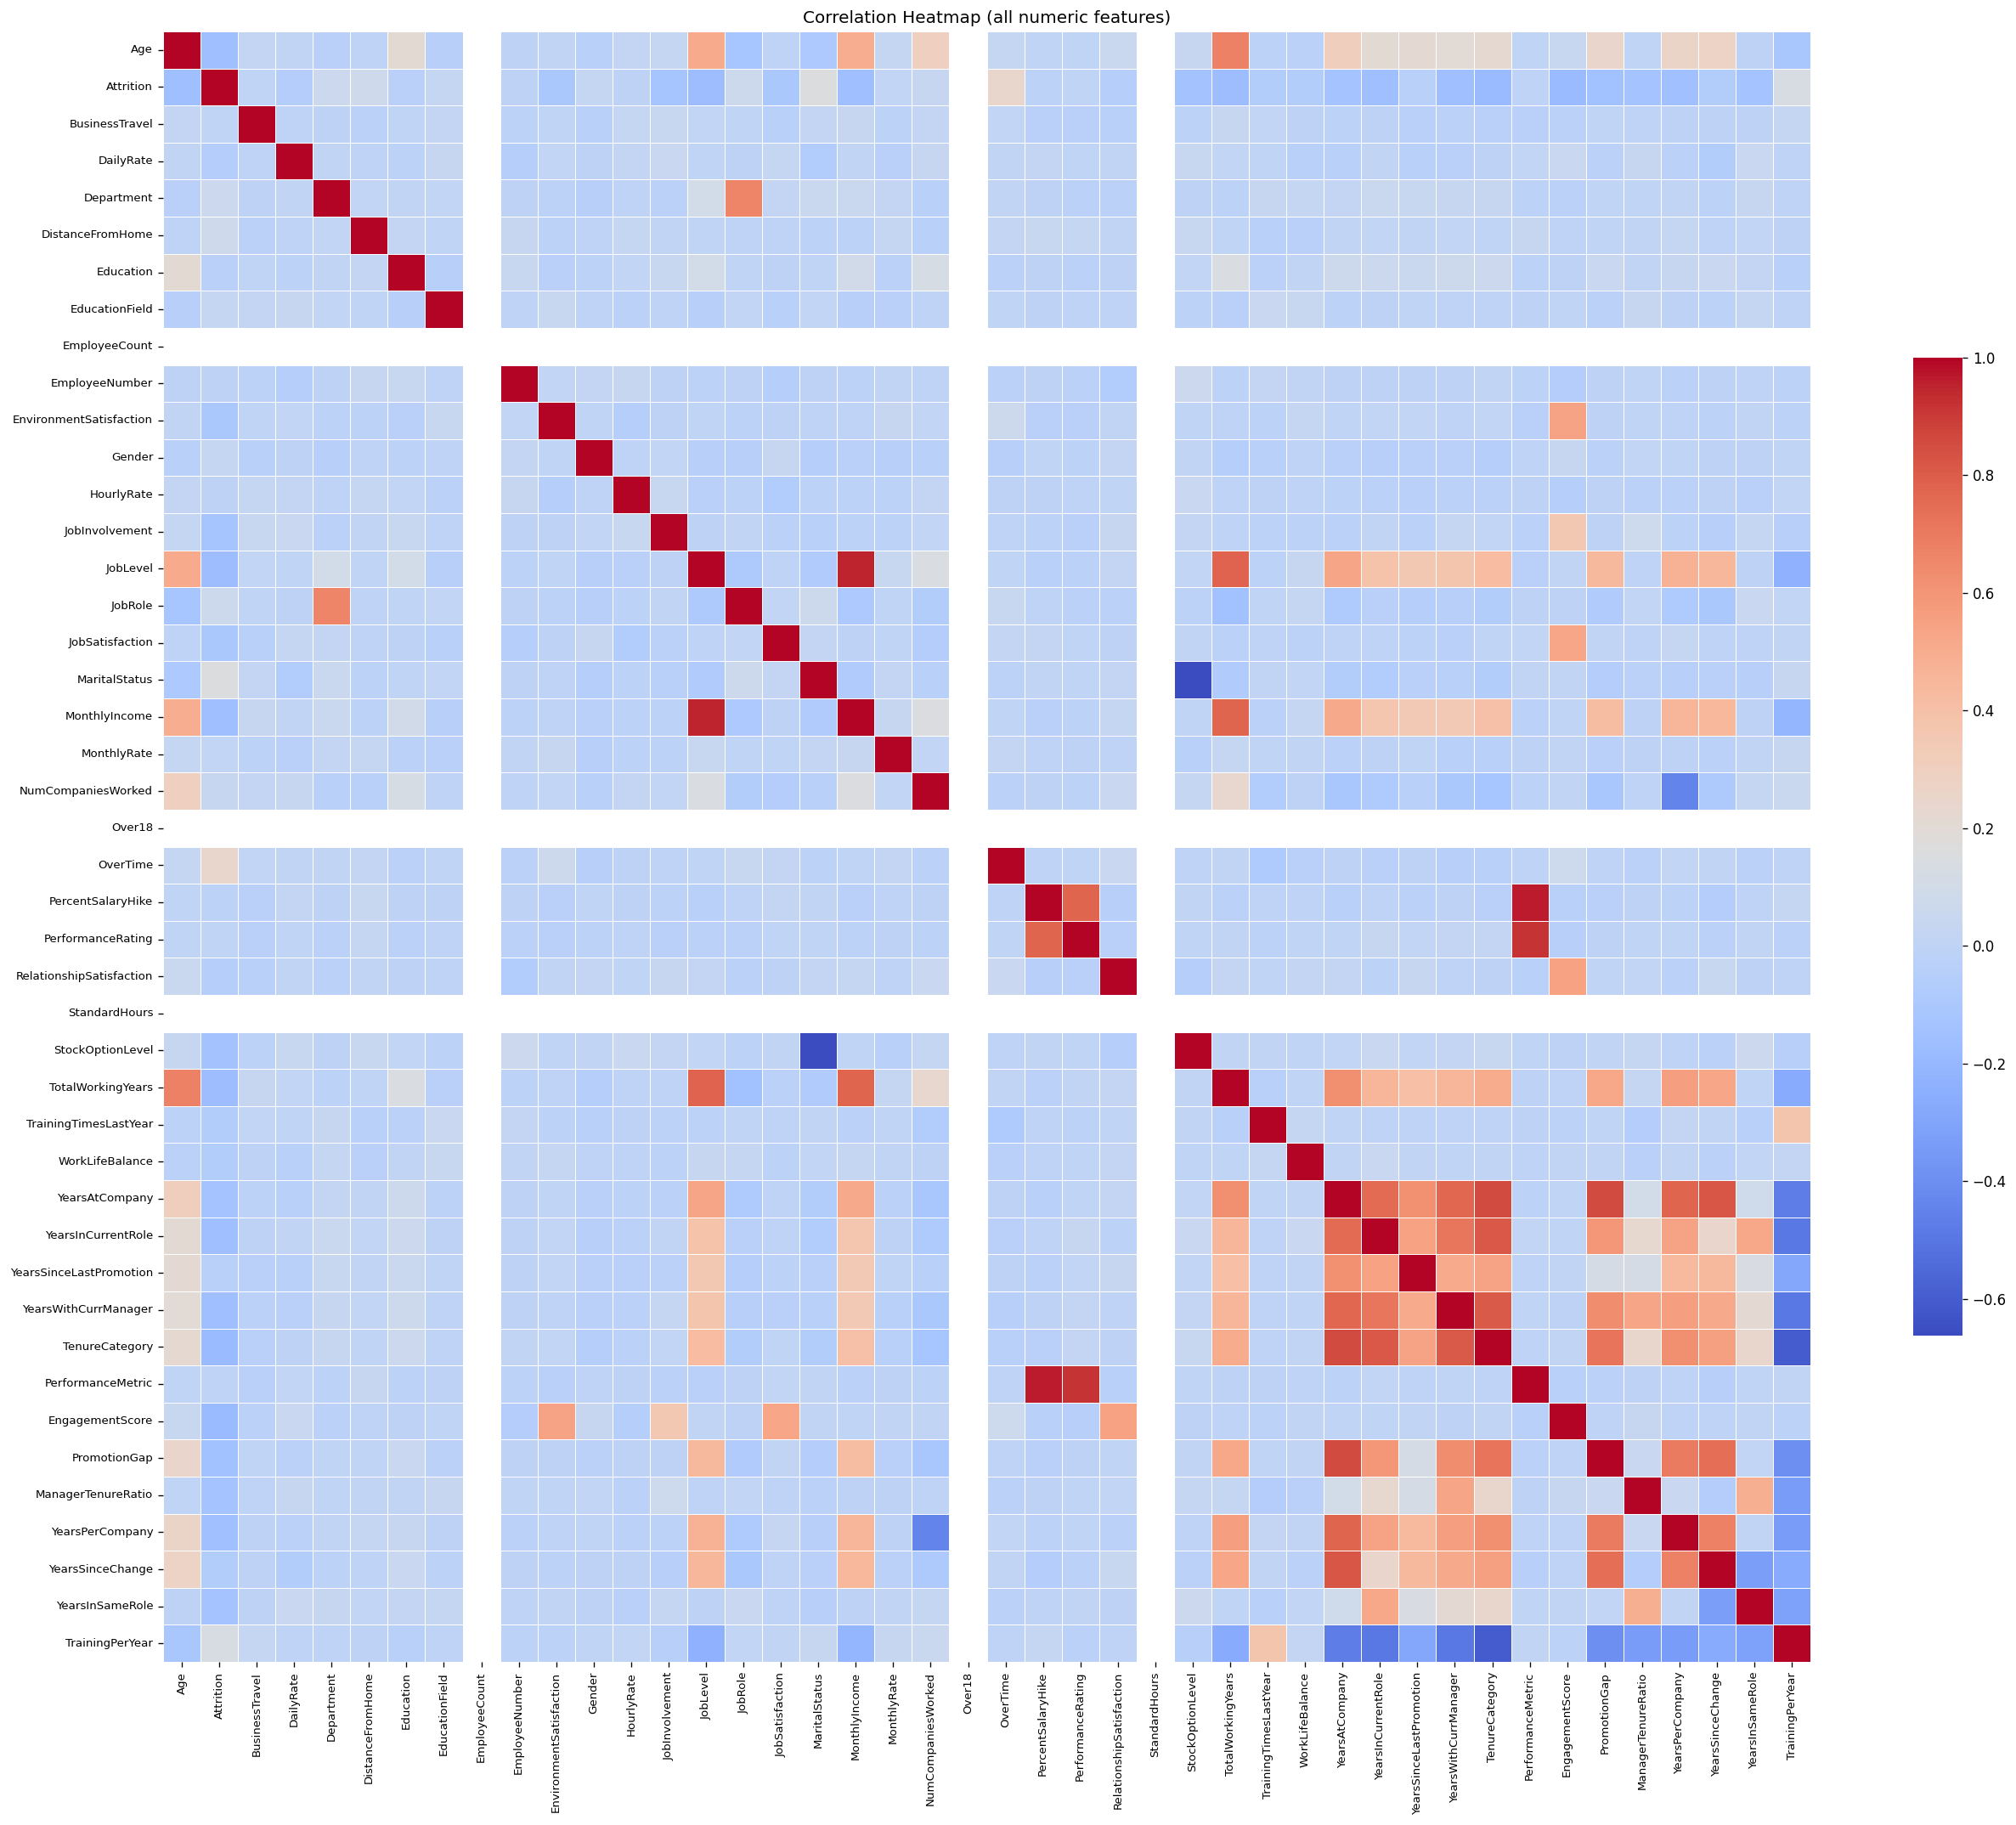

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

corr_matrix = df_loaded.corr()                         # only numeric cols
plt.figure(figsize=(22, 18), dpi=120)                  # <‑‑ bigger canvas
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    square=False,
    linewidths=.5,
    cbar_kws={'shrink': .6},
)
plt.xticks(rotation=90, ha='center', fontsize=8)       # readable labels
plt.yticks(rotation=0, fontsize=8)
plt.title('Correlation Heatmap (all numeric features)')
plt.tight_layout()
plt.show()

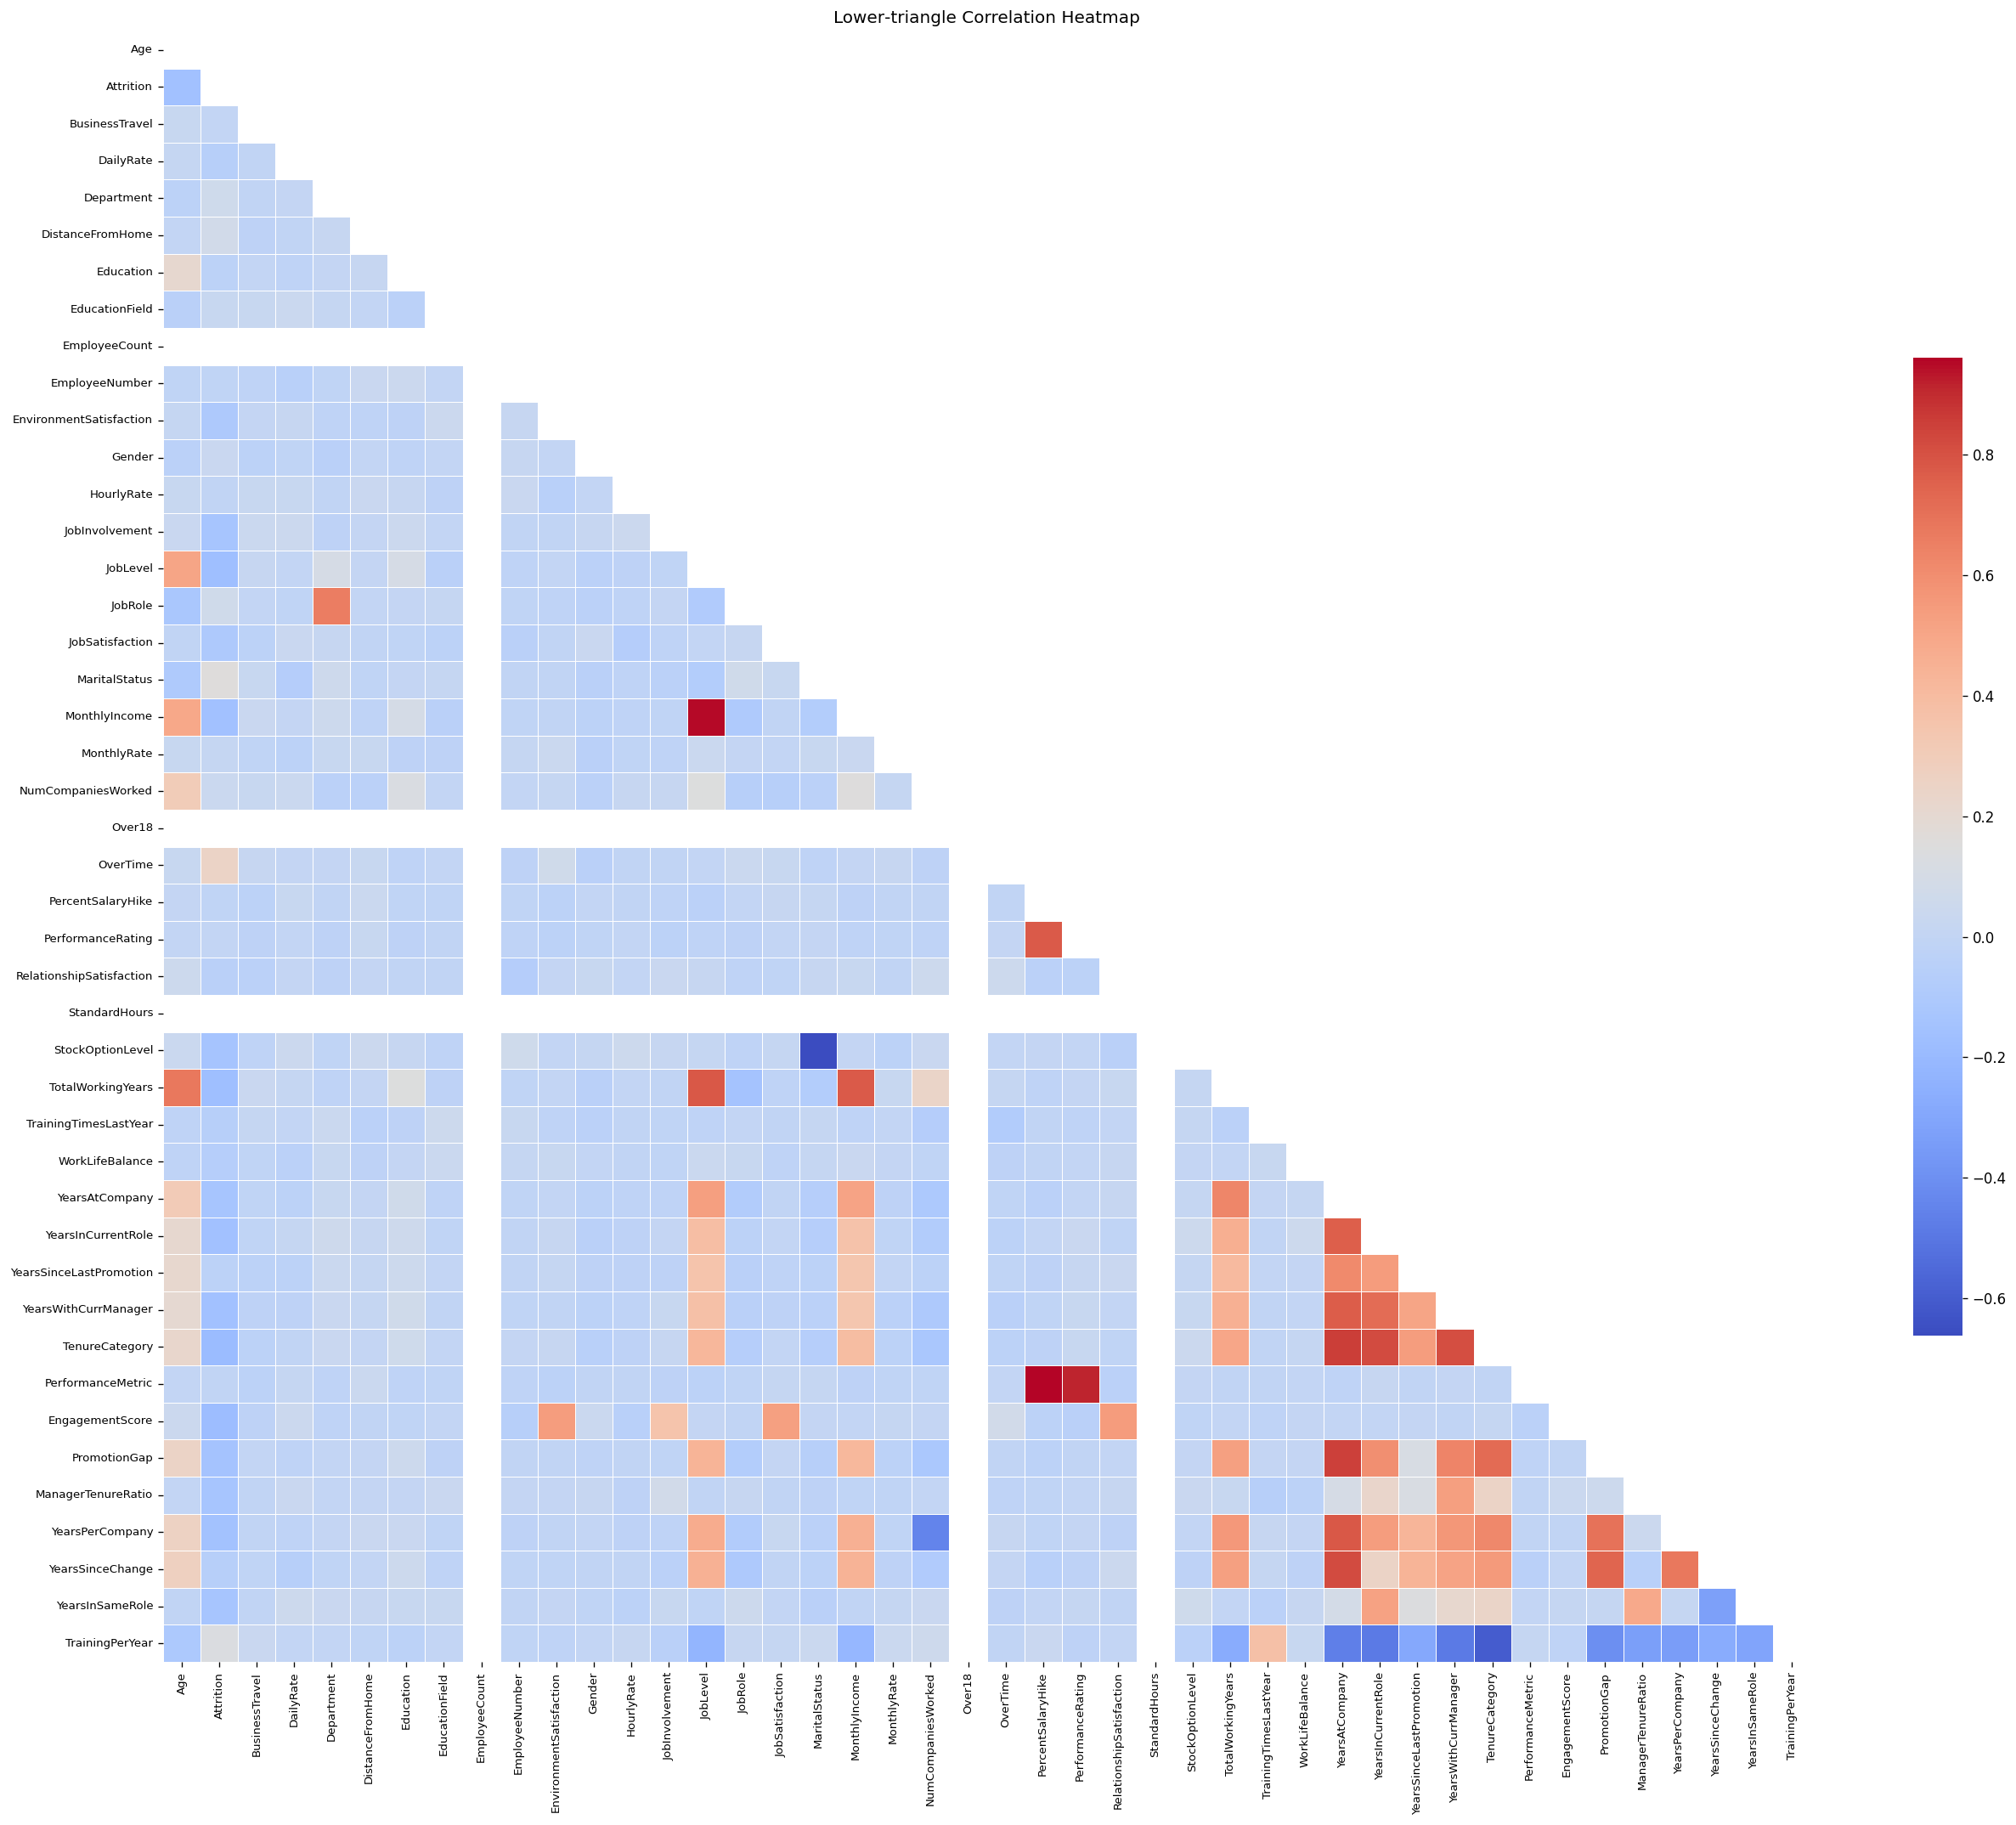

In [215]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # mask upper half
plt.figure(figsize=(22, 18), dpi=120)
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    square=False,
    linewidths=.5,
    cbar_kws={'shrink': .6},
)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0,  fontsize=8)
plt.title('Lower‑triangle Correlation Heatmap')
plt.tight_layout()
plt.show()


In [216]:
plt.figure(figsize=(28, 24), dpi=300)
sns.heatmap(corr_matrix, cmap='coolwarm', square=False)
plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=6)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', bbox_inches='tight')   # or .pdf

# Model Training

In [ ]:
from sklearn.model_selection import train_test_split

# --- Key drivers of attrition (numeric + encoded) ---
important_cols = [

    # Engagement / satisfaction
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'RelationshipSatisfaction',
    'JobInvolvement',
    'WorkLifeBalance',
    'EngagementScore',          # engineered

    # Work history & promotion
    'YearsAtCompany',
    'YearsSinceLastPromotion',
    'YearsPerCompany',          # engineered
    'YearsSinceChange',         # engineered
    'PromotionGap',             # engineered
    'ManagerTenureRatio',       # engineered

    # Effort & workload
    'OverTime',                 # binary label‑encoded (Yes = 1, No = 0)
    'TrainingPerYear',          # engineered

    # Compensation
    'MonthlyIncome',
    'PercentSalaryHike',# engineered

    # Demographics / tenure buckets
    'Age',
    'TenureCategory',    # ordinal‑encoded

    # One‑hot categorical dummies (examples; include all you have)
    'Department_Sales',
    'Department_Research & Development',
    'Gender_Male',
    'JobRole_Sales Executive',
    'JobRole_Laboratory Technician',
    'EducationField_Life Sciences',
    # … add the rest of your one‑hot columns …
]

# Build the final feature matrix
cols_in_df = [c for c in important_cols if c in df.columns]
missing     = set(important_cols) - set(cols_in_df)
if missing:
    print("⚠️  These features were not found and will be skipped:", missing)

x = df[cols_in_df]

# Verify shape
print("Shape of X:", x.shape)
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

Shape of X: (1470, 24)


## Model Creation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train Classifers
log_reg_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
d_tree_model = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)
rand_forest_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Predictions

In [ ]:
# Model Predictions
log_reg_prediction = log_reg_model.predict(x_test)
d_tree_prediction = d_tree_model.predict(x_test)
rand_forest_prediction = rand_forest_model.predict(x_test)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Model Evaluation
results = {
    "Logistic Regression": { 'Accuracy': accuracy_score(y_test, log_reg_prediction),
                            'Report' : classification_report(y_test, log_reg_prediction, output_dict=True)},

    "Decision Tree": {'Accuracy': accuracy_score(y_test, d_tree_prediction),
                      'Report' : classification_report(y_test, d_tree_prediction, output_dict=True)},

    "Random Forest": {'Accuracy': accuracy_score(y_test, rand_forest_prediction),
                      'Report' : classification_report(y_test, rand_forest_prediction, output_dict=True)}
}

results

{'Logistic Regression': {'Accuracy': 0.8673469387755102,
  'Report': {'0': {'precision': 0.8802816901408451,
    'recall': 0.9803921568627451,
    'f1-score': 0.9276437847866419,
    'support': 255.0},
   '1': {'precision': 0.5,
    'recall': 0.1282051282051282,
    'f1-score': 0.20408163265306123,
    'support': 39.0},
   'accuracy': 0.8673469387755102,
   'macro avg': {'precision': 0.6901408450704225,
    'recall': 0.5542986425339367,
    'f1-score': 0.5658627087198516,
    'support': 294.0},
   'weighted avg': {'precision': 0.8298361598160392,
    'recall': 0.8673469387755102,
    'f1-score': 0.8316610503199424,
    'support': 294.0}}},
 'Decision Tree': {'Accuracy': 0.7993197278911565,
  'Report': {'0': {'precision': 0.9049586776859504,
    'recall': 0.8588235294117647,
    'f1-score': 0.8812877263581489,
    'support': 255.0},
   '1': {'precision': 0.3076923076923077,
    'recall': 0.41025641025641024,
    'f1-score': 0.3516483516483517,
    'support': 39.0},
   'accuracy': 0.7993

In [ ]:
new_df = pd.DataFrame(results)
new_df

,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.867347,0.79932,0.867347
Report,"{'0': {'precision': 0.8802816901408451, 'recal...","{'0': {'precision': 0.9049586776859504, 'recal...","{'0': {'precision': 0.8829787234042553, 'recal..."


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Classification reports
report_log = classification_report(y_test, log_reg_prediction, output_dict=True)
report_tree = classification_report(y_test, d_tree_prediction, output_dict=True)
report_rf = classification_report(y_test, rand_forest_prediction, output_dict=True)

# Extract scores from 'weighted avg'
metrics = ['precision', 'recall', 'f1-score']

comparison_table = pd.DataFrame({
    'Score Metric': [metric.capitalize() for metric in metrics],
    'Logistic Regression': [report_log['weighted avg'][metric] for metric in metrics],
    'Decision Tree': [report_tree['weighted avg'][metric] for metric in metrics],
    'Random Forest': [report_rf['weighted avg'][metric] for metric in metrics]
})

# Round for better display
comparison_table = comparison_table.round(3)

# Show the table
print(comparison_table)


  Score Metric  Logistic Regression  Decision Tree  Random Forest
0    Precision                0.830          0.826          0.832
1       Recall                0.867          0.799          0.867
2     F1-score                0.832          0.811          0.836


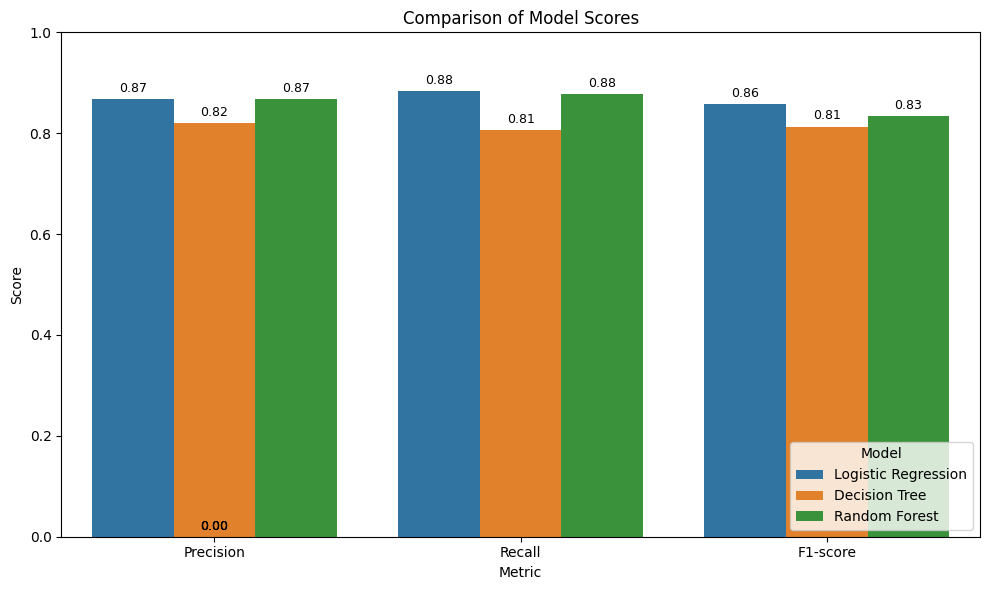

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create the comparison table
metrics = ['precision', 'recall', 'f1-score']
comparison_table = pd.DataFrame({
    'Score Metric': [metric.capitalize() for metric in metrics],
    'Logistic Regression': [report_log['weighted avg'][m] for m in metrics],
    'Decision Tree': [report_tree['weighted avg'][m] for m in metrics],
    'Random Forest': [report_rf['weighted avg'][m] for m in metrics]
}).round(3)

# Melt the table to long format for Seaborn
df_plot = comparison_table.melt(id_vars='Score Metric',
                                 var_name='Model',
                                 value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Score Metric', y='Score', hue='Model')
plt.title('Comparison of Model Scores')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()